In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


In [2]:
df=pd.read_csv('df_clean.csv')
df=df.drop('Unnamed: 0', axis=1)
df.head()

,Name,Platform,Year,Genre,Publisher,Global_Sales,Meta_NP,Meta_VP,Meta_NUsers,Meta_VUsers,test_note_JVC,avis_count_JVC,avis_note_JVC,Classification_Age_JVC,Support_JVC,langue_parlée_JVC,texte_JVC
0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24,84.0,14.0,8.4,119.0,19.0,3.0,19.0,3.0,Autre,français,français
1,Tetris,GB,1989.0,Puzzle,Nintendo,30.26,65.0,10.0,8.0,7.0,11.0,8.0,17.8,3.0,Autre,français,français
2,Wii Play,Wii,2006.0,Misc,Nintendo,29.02,58.0,41.0,6.6,190.0,12.0,223.0,12.1,3.0,DVD,français,français
3,Nintendogs,DS,2005.0,Simulation,Nintendo,24.76,83.0,54.0,7.6,125.0,15.0,159.0,16.4,3.0,Cartouche,français,français
4,Wii Fit,Wii,2007.0,Sports,Nintendo,22.72,80.0,63.0,7.7,164.0,15.0,227.0,16.2,3.0,DVD,français,français


### Feature engineering pour la colonne Name

In [3]:
import re

def tokenize_game_name(name):
    # Supprimer les caractères spéciaux, les chiffres et les espaces pour obtenir un nom de jeu combiné
    return re.sub(r'[^\w ]', '', re.sub(r'\d+', '', name))


In [4]:
df['game_name'] = df['Name'].apply(tokenize_game_name)

In [5]:
from nltk.tokenize import word_tokenize

game_tokens = word_tokenize(' '.join(df['game_name']))


In [6]:
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
additional_stop_words = set(["?", "2", "3", "4", "!", ".", 
                             ",", ":", ";", "-", "--", 
                             "...", "\"", "'", "they've", 
                             "they're", "they'll", "i've", 
                             "i'm", "i'll", "could", "The", "'s"])
stop_words = stop_words.union(additional_stop_words)

#filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

def stop_words_filtering(mots) : 
    tokens = []
    for mot in mots:
        if mot not in stop_words:
            tokens.append(mot)
    return tokens

# Appliquer la fonction stop_words_filtering à la variable mots
game_filtered_tokens =stop_words_filtering(game_tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\debor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
from nltk.probability import FreqDist
game_freqdist = FreqDist(game_filtered_tokens)

In [8]:
print(game_freqdist.most_common(50))

[('II', 134), ('Star', 119), ('World', 116), ('Wars', 116), ('NBA', 90), ('Dragon', 89), ('Warriors', 86), ('vs', 83), ('K', 82), ('Super', 79), ('Heroes', 74), ('NFL', 71), ('LEGO', 65), ('Tom', 64), ('Clancys', 64), ('Speed', 63), ('Pro', 61), ('Game', 61), ('Battle', 60), ('Need', 59), ('Ninja', 58), ('Dead', 58), ('III', 55), ('Racing', 55), ('Final', 54), ('Legends', 54), ('Fantasy', 52), ('Ultimate', 52), ('NHL', 52), ('War', 51), ('Legend', 51), ('X', 51), ('Force', 50), ('Evolution', 49), ('Dark', 49), ('Madden', 48), ('Mario', 47), ('Street', 46), ('Tour', 46), ('Hero', 45), ('Call', 44), ('Dance', 44), ('Evil', 43), ('Adventure', 43), ('Rise', 43), ('Metal', 42), ('Party', 42), ('Collection', 41), ('Soccer', 41), ('Shadow', 41)]


In [9]:
df_game_freqdist = pd.DataFrame(game_freqdist.items(), columns=['token', 'fréquence'])


In [10]:
df_game_freqdist = df_game_freqdist.sort_values(by='fréquence', ascending=False)

freq_top = 80
freq_good = 50
freq_correct = 20

top = df_game_freqdist[df_game_freqdist['fréquence'] >= freq_top]
good = df_game_freqdist[(df_game_freqdist['fréquence'] < freq_top) & (df_game_freqdist['fréquence'] >= freq_good)]
correct = df_game_freqdist[(df_game_freqdist['fréquence'] < freq_good) & (df_game_freqdist['fréquence'] >= freq_correct)]
bad = df_game_freqdist[df_game_freqdist['fréquence'] < freq_correct]

In [11]:
# Définition d'une fonction qui retourne la catégorie correspondante en fonction des mots présents dans le nom de jeu
def get_categorie(freq):
    if freq > freq_top:
        return 1
    elif freq > freq_good:
        return 2
    elif freq > freq_correct:
        return 3
    else:
        return 4

df_game_freqdist['freq_name'] = df_game_freqdist['fréquence'].apply(lambda freq: get_categorie(freq))

In [12]:
df_game_freqdist.head(10)

,token,fréquence,freq_name
25,II,134,1
84,Star,119,1
16,World,116,1
85,Wars,116,1
207,NBA,90,1
123,Dragon,89,1
150,Warriors,86,1
351,vs,83,1
208,K,82,1
0,Super,79,2


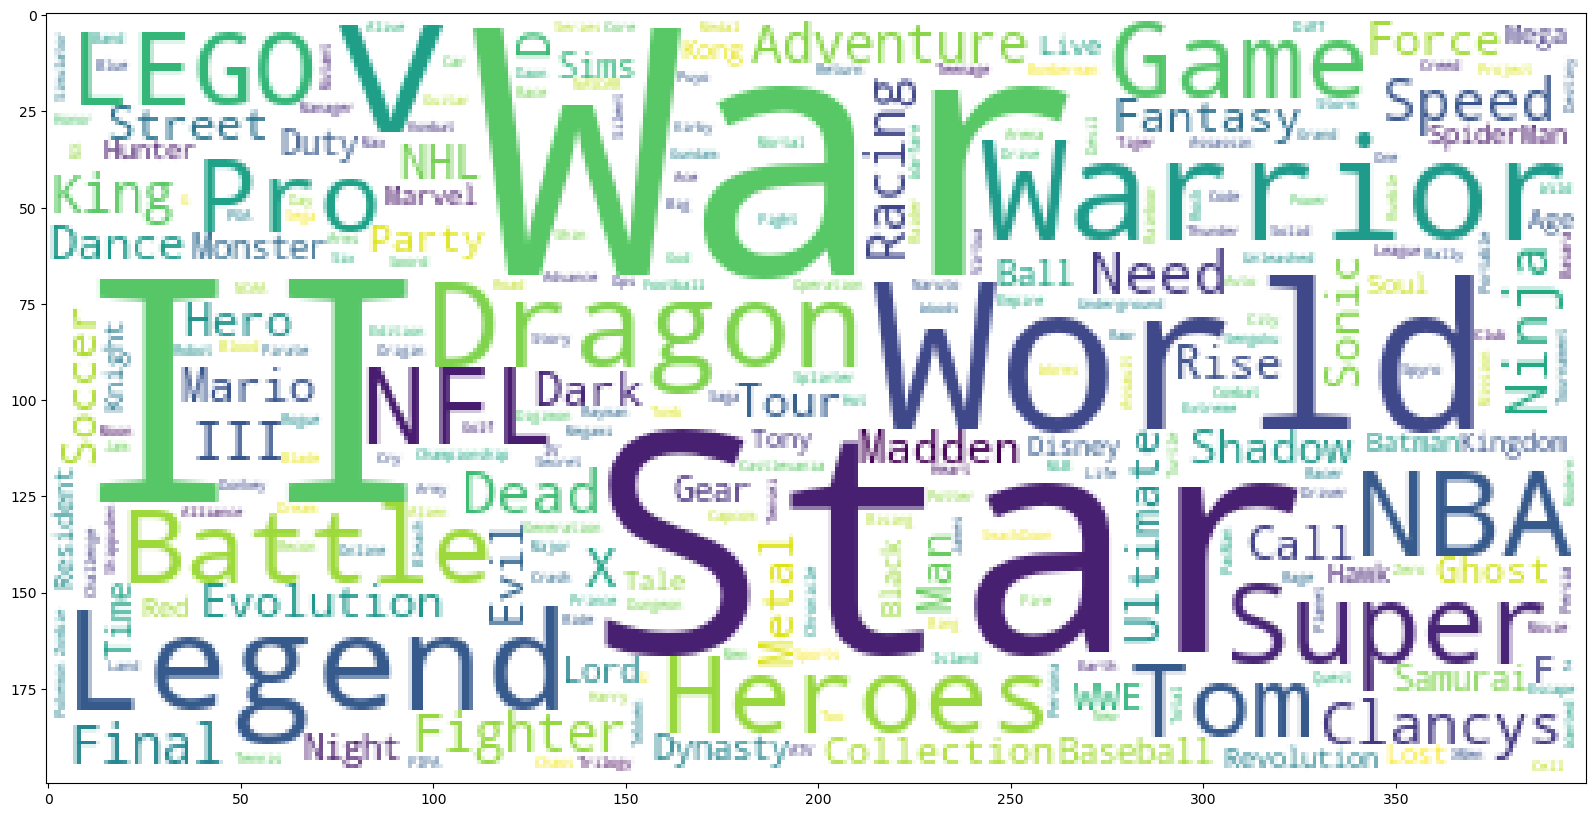

In [13]:
from PIL import Image

import numpy as np

#mask = np.array(Image.open("trump.jpg"))

from wordcloud import WordCloud

wc = WordCloud(background_color="white", 
               max_words=1000, 
               max_font_size=90, 
               collocations=False,
               random_state=42)
               #mask=mask)

import matplotlib.pyplot as plt

text = ' '.join(game_tokens)
wc.generate(text)

plt.figure(figsize= (20,10))
plt.imshow(wc)
plt.show();

In [14]:
#df.to_csv('df_clean.csv')